<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Fundamental Factors](Introduction.ipynb) › Lesson 11: Altman Z-Score
***

# Analyzing the Altman Z-Score with Alphalens

Let's use Alphalens to explore the forward performance of stocks based on their Altman Z-Score. In previous notebooks we formed equal-sizes quantiles, but in this notebook we'll form bins corresponding to the Altman Z-Scores three "zones":

* Distress Zone: Z-Score < 0
* Grey Zone: 0 < Z-Score < 3
* Safe zone: Z-Score > 3

Defining your own bin edges can be done either in the Alphalens' `from_pipeline()` function or in the Pipeline definition itself. First, we'll show how to do it in Alphalens, and then we'll show how to do it in Pipeline.

## Defining bin edges in Alphalens

To define the bin edges in Alphalens, we can start by creating a simple Pipeline that contains the Altman Z-Score factor: 

In [1]:
from zipline.pipeline import sharadar, Pipeline
from codeload.fundamental_factors.universe import BaseUniverse

universe = BaseUniverse() 

altman = sharadar.AltmanZScore('ART', mask=universe)

pipeline = Pipeline(
    columns={
        'altman': altman,
    },
    screen=universe & altman.notnull()
)

The Alphalens `from_pipeline()` function contains two, mutually exclusive parameters that control how the factor will be binned: `quantiles` and `bins`. 

In the previous notebooks, we specified `quantiles=n` to create `n` equal-sized bins. Under the hood, this caused Alphalens to pass the factor data to pandas' `qcut()` function, which calculates the bin edges needed to have the same number of items in each bin.   

In this notebook, we will use the `bins` argument to tell Alphalens where the bin edges should be. Under the hood, this will cause Alphalens to pass the factor data to pandas' `cut()` function. To split the data into three bins, where the first bin contains everything below 0, the second bin goes from 0 to 3, and the third bin contains everything above 3, we can pass the following `bins` argument:

```python
bins=[-float("inf"), 0, 3, float("inf")]
```

Since we want 3 bins, we have to pass 4 bin edges; the length of the list you pass to `bins` will always be the desired number of bins plus one. The range of the first bin is defined by the first two numbers (here, minus infinity and 0), the range of the second bin is defined by the second and third numbers (0 and 3), and the range of the third bin is defined by the third and fourth numbers (3 and infinity).


,min,max,mean,std,count,avg daily count,count %
Factor Quantile,,,,,,,
1,"-326,034.031",-0.000,-15.047,"1,409.017","1,754,117",279.7,9.4%
2,0.000,3.000,1.735,0.777,"6,916,887",1103.0,37.2%
3,3.000,"98,844.000",13.502,296.604,"9,924,833",1582.7,53.4%


,1D,21D,5D
Ann. alpha,-0.042,-0.026,-0.025
beta,0.057,-0.016,0.023
Mean Relative Return Top Quantile (bps),0.101,-0.039,0.048
Mean Relative Return Bottom Quantile (bps),-1.379,-1.423,-1.507
Mean Spread (bps),1.480,1.987,1.861


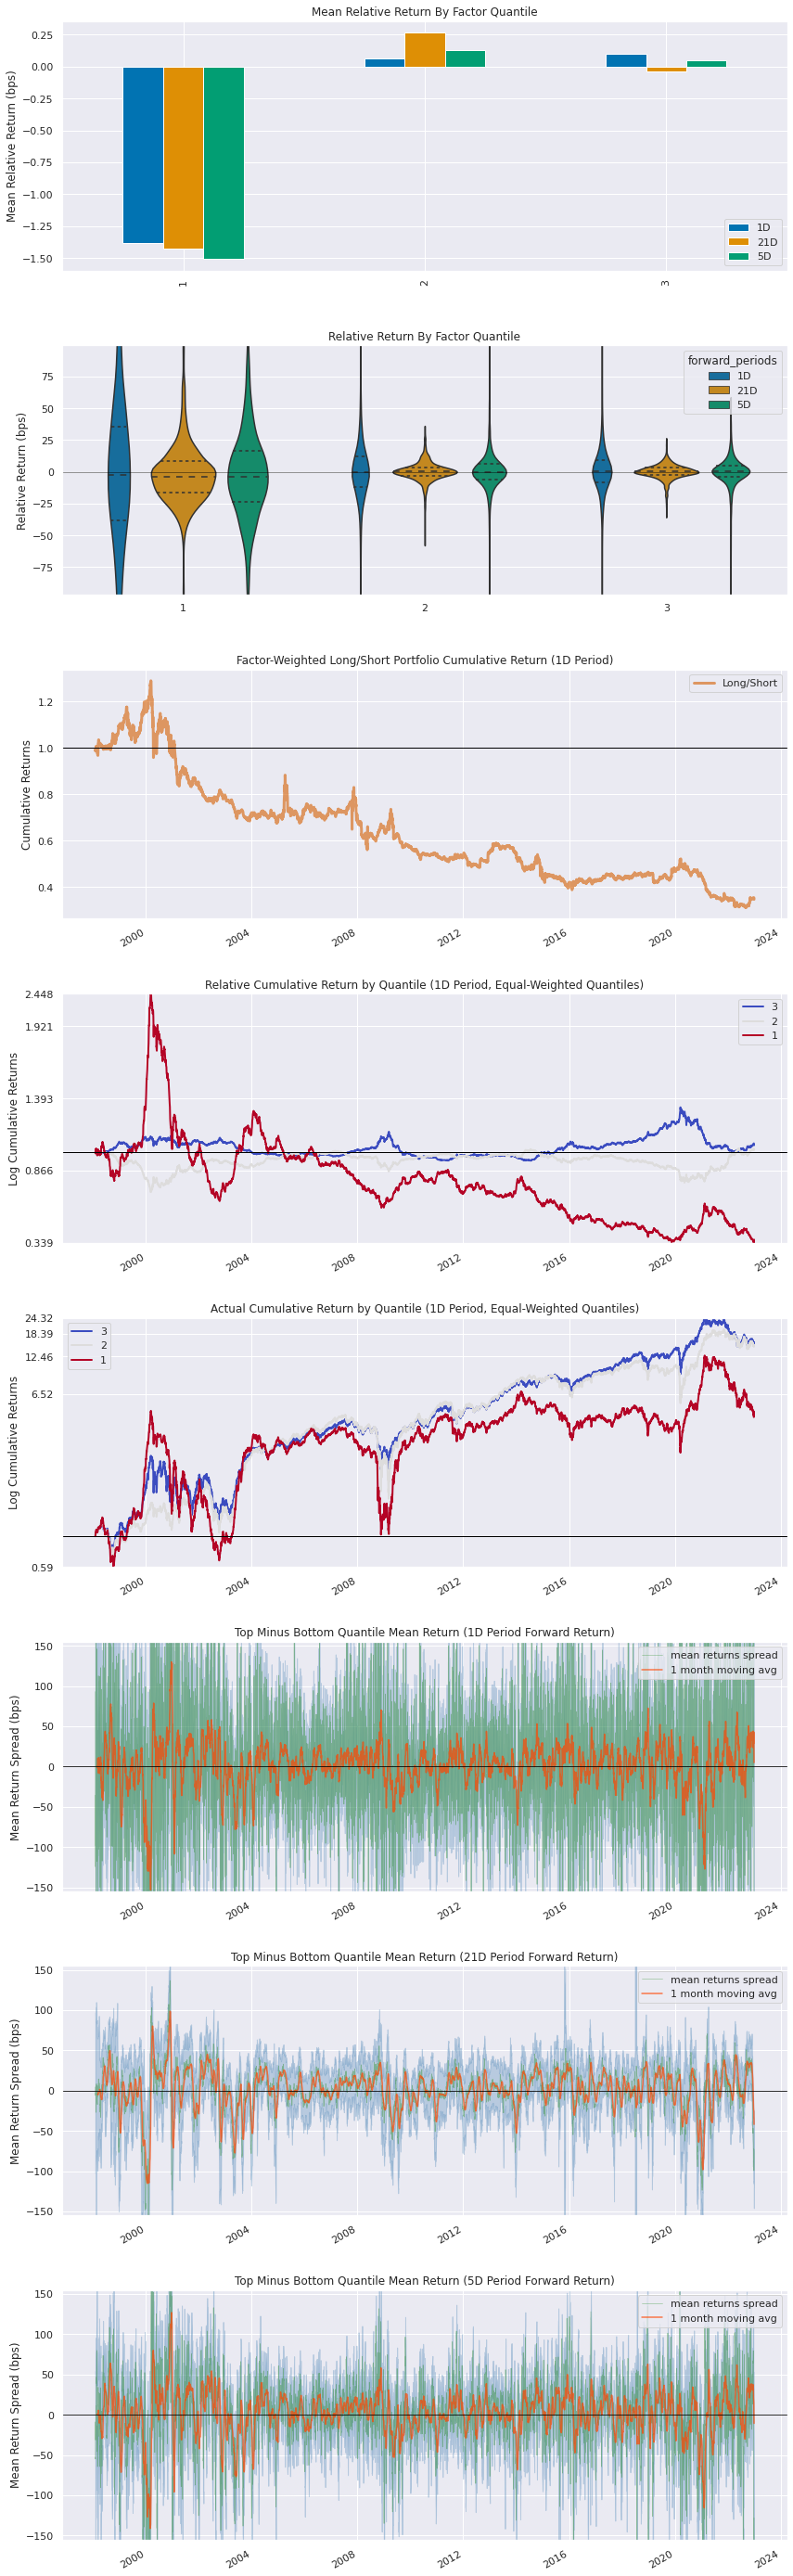

,1D,21D,5D
IC Mean,0.011,0.018,0.015
IC Std.,0.065,0.082,0.073
Risk-Adjusted IC,0.165,0.216,0.212
t-stat(IC),13.036,17.070,16.826
p-value(IC),0.000,0.000,0.000
IC Skew,-0.121,-0.261,-0.267
IC Kurtosis,0.978,0.269,0.945


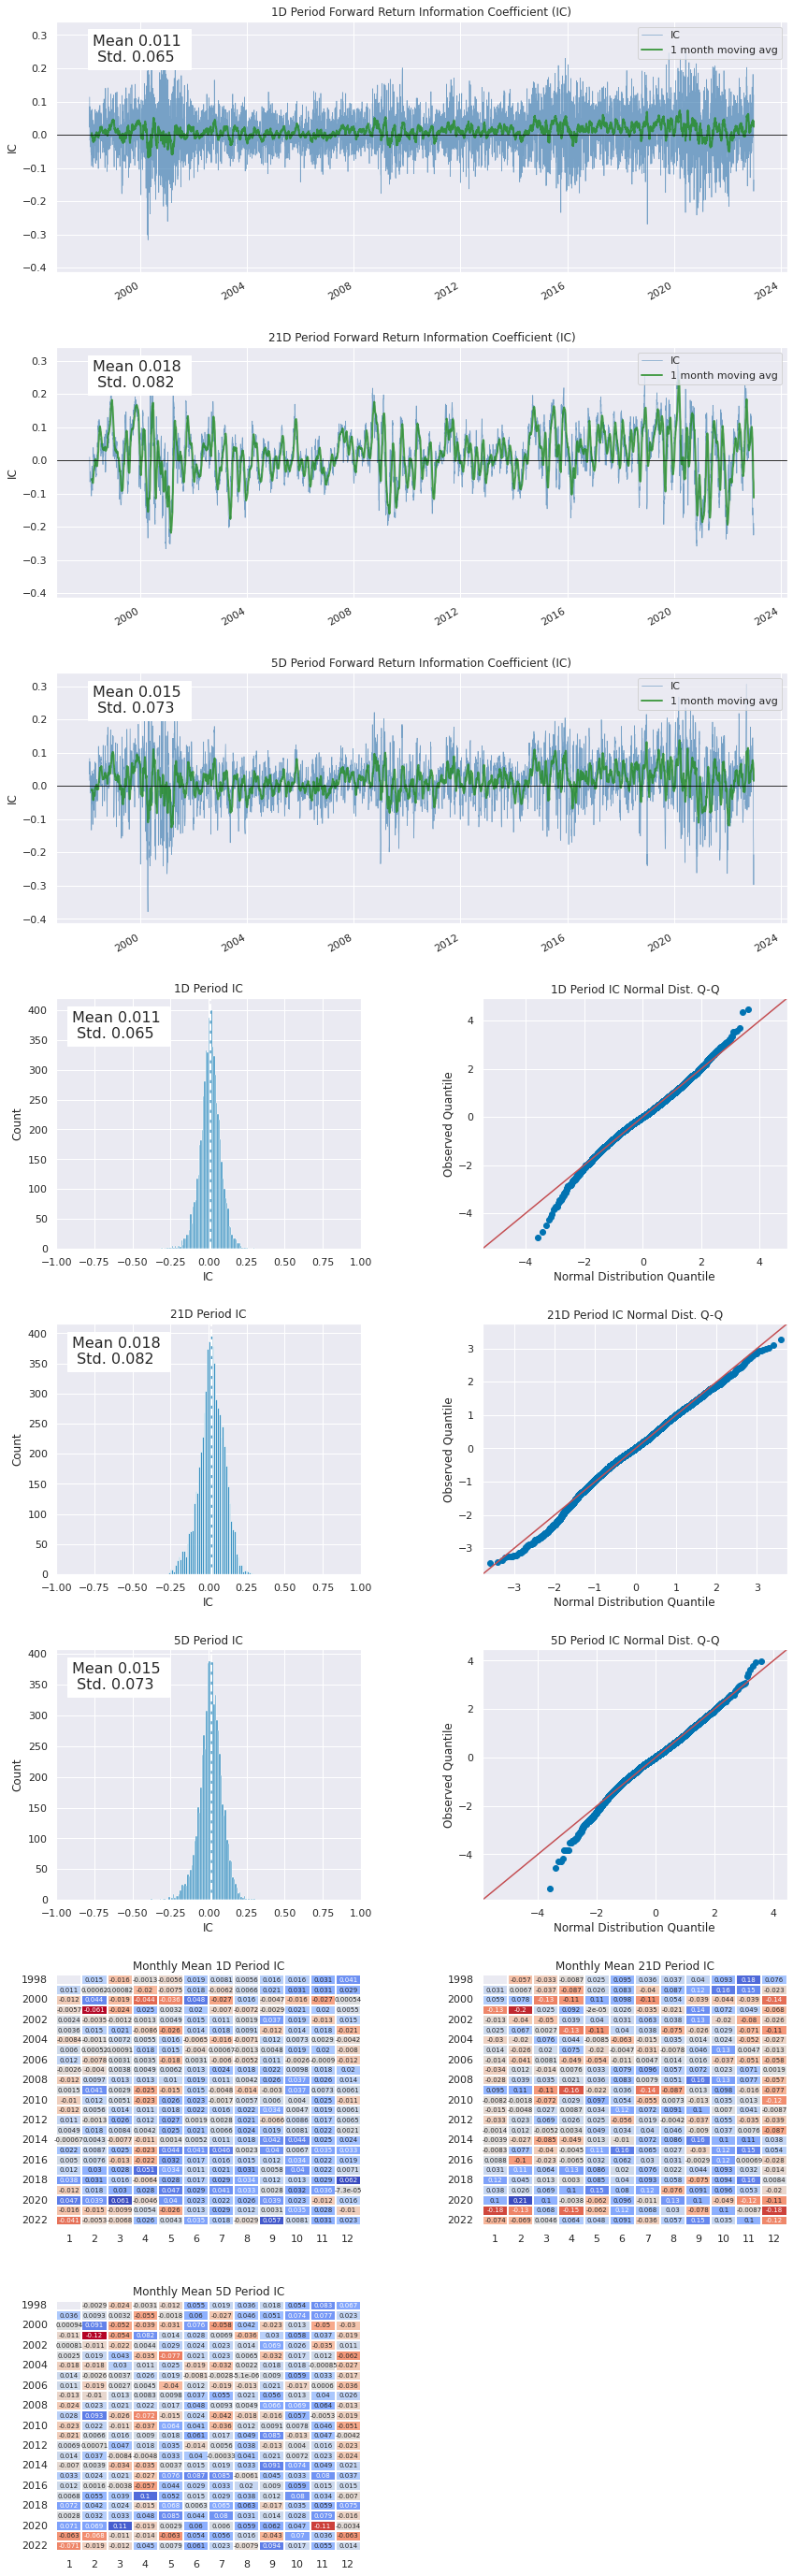

,1D,5D,21D
Quantile 1 Mean Turnover,0.008,0.037,0.133
Quantile 2 Mean Turnover,0.004,0.019,0.070
Quantile 3 Mean Turnover,0.003,0.013,0.049


,1D,21D,5D
Mean Factor Rank Autocorrelation,0.999,0.978,0.995


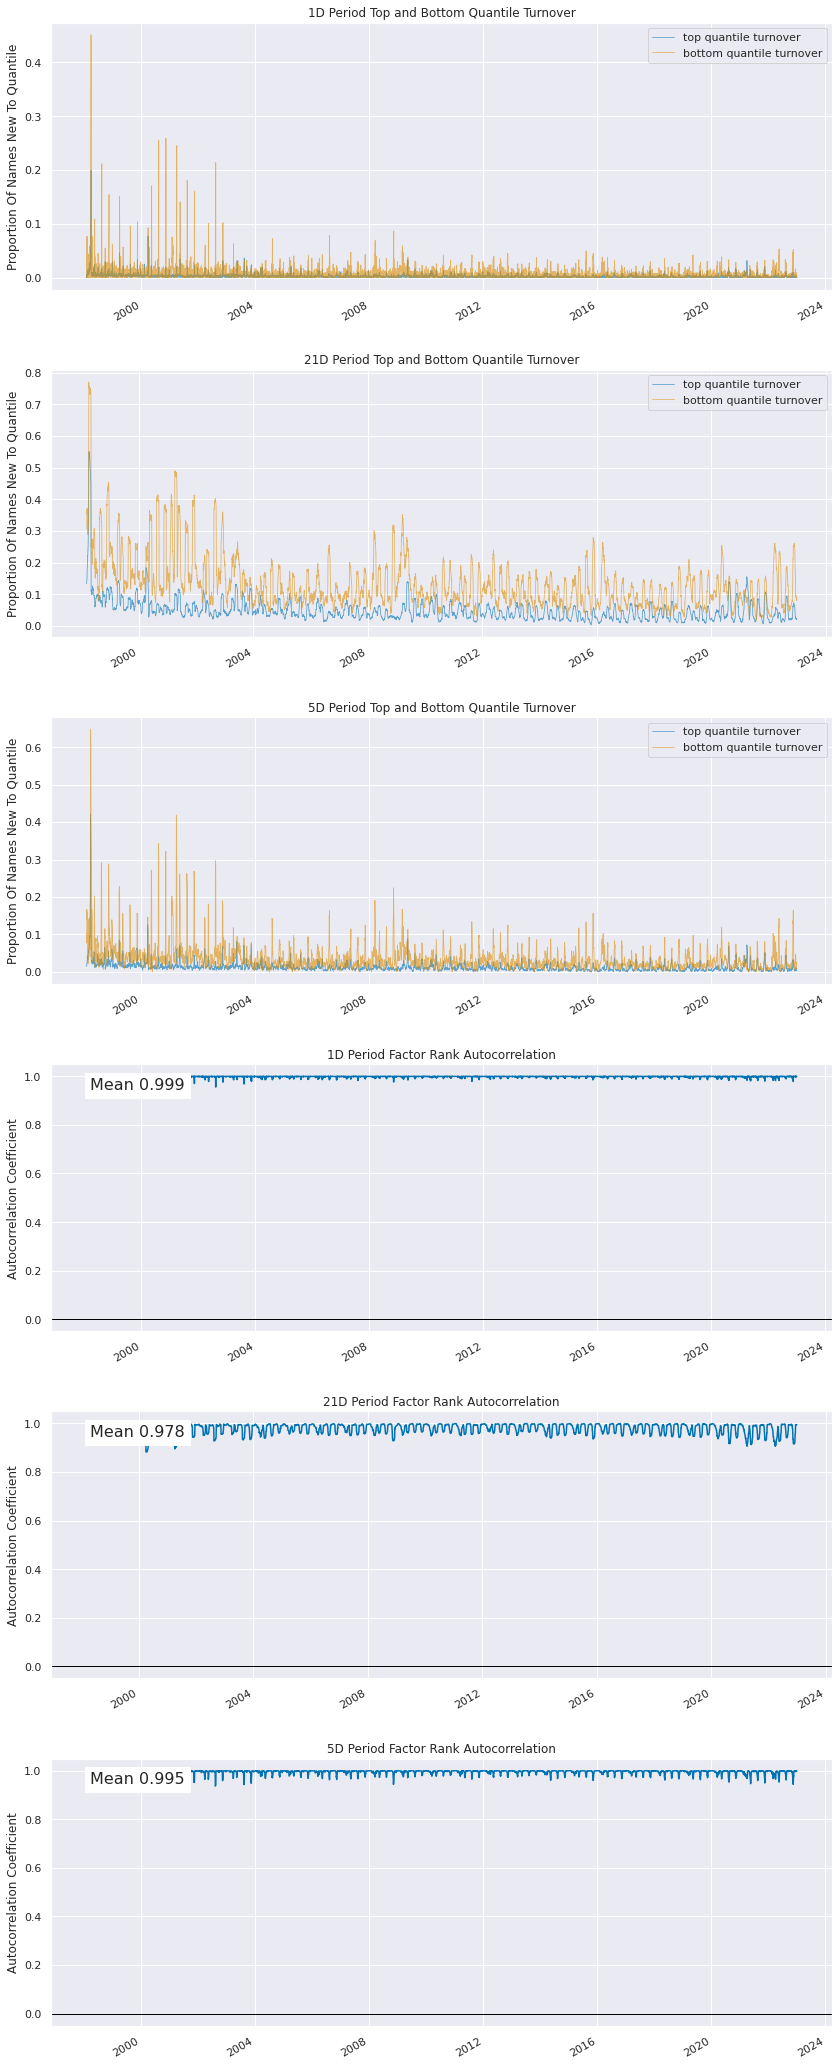

In [2]:
import alphalens as al

al.from_pipeline(
    pipeline,
    start_date="1998-02-01",
    end_date="2022-12-30",
    periods=[1, 5, 21],
    factor="altman",
    bins=[-float("inf"), 0, 3, float("inf")],
    segment="Y"
)

## Tear sheet commentary

### Factor Distribution table

* `min`/`max`: For each factor quantile, we can check the minimum and maximum values to make sure they are as we expected. Here, everything in quantile 1 is below 0, everything in quantile 2 is between 0 and 3, and everything in quantile 3 is above 3.
* `count %`: Because we defined the bin edges instead of using equal-sized quantiles, the quantiles are different sizes. Less than 10% of stocks are in the distress zone, ~40% are in the grey zone, and ~50% are in the safe zone.

### Returns Analysis

* `Mean Relative Return By Factor Quantile`: companies in distress perform worse than companies not in distress. There is little difference between the safe zone and the grey zone.

## Defining bin edges in Pipeline

Suppose you want to define the bin edges in Pipeline instead of in Alphalens, perhaps because you're not feeding the Pipeline output to Alphalens. A good way to do this is using the `Constant` factor. Here, we define a factor for the 3 Altman Z-Score zones, with 1 being the distress zone, 2 being the grey zone, and 3 being the safe zone:

In [3]:
from zipline.pipeline import Constant

altman = sharadar.AltmanZScore('ART')

altman_zone = Constant(1).where(altman<=0, Constant(2).where(altman<=3, Constant(3).where(altman > 3)))

***

## *Next Up*

Lesson 12: [Multi-Factor Scores](Lesson12-Multi-Factor-Scores.ipynb)